# Pyber Ride Sharing Data

## Analysis

-  Observed Trend 1 : Urban market has the highest fare share of approximately 63%

-  Observed Trend 2 : Urban market has the highest ride share of approximately 68.4%

-  Observed Trend 3 : Urban market has the highest driver share of approximately 77.8%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cityData = pd.read_csv('raw_data/city_data.csv')
rideData = pd.read_csv('raw_data/ride_data.csv')

### Bubble Plot of Ride Sharing Data

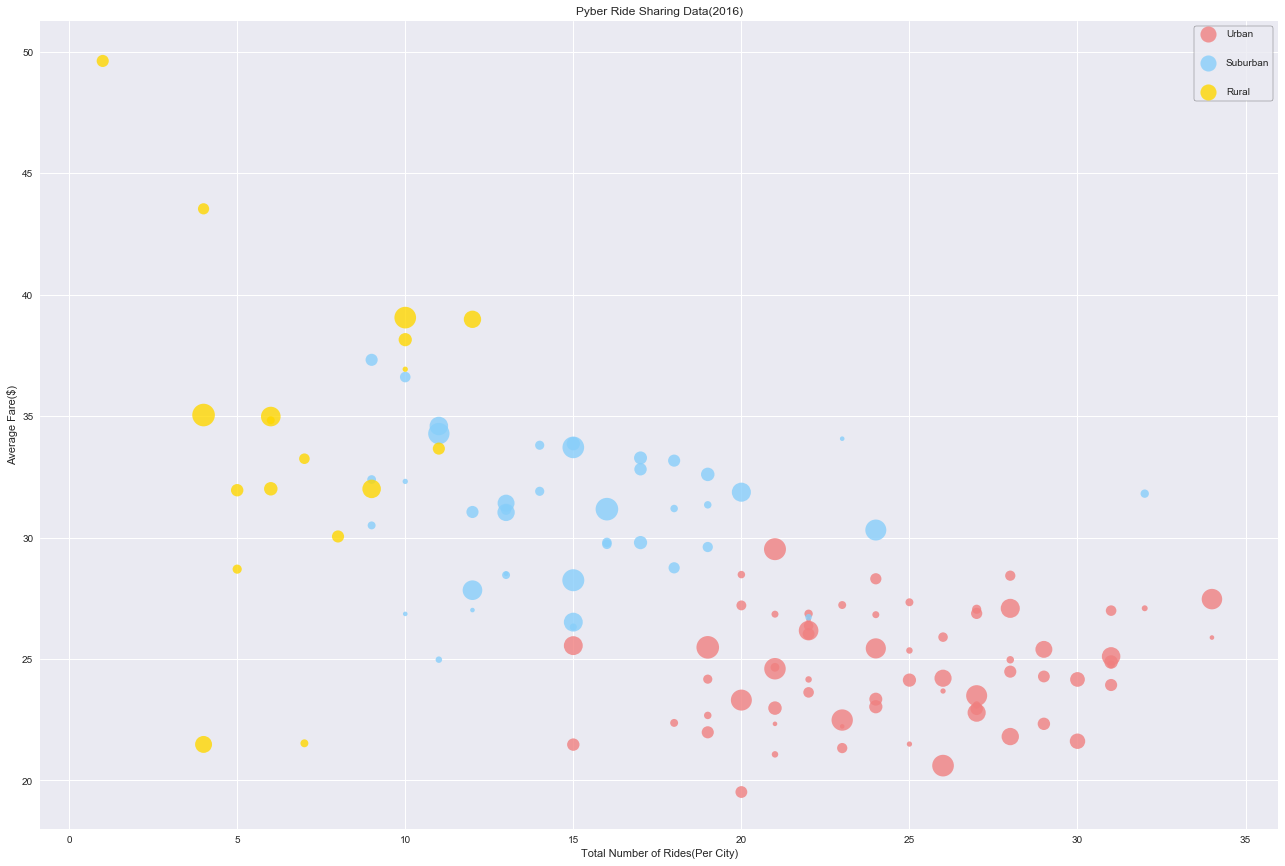

In [3]:
cityDataUnqTyp = cityData.drop_duplicates(['city'])
cityDataUnqTyp = cityDataUnqTyp.set_index(['city'])
cityDataUnqTyp.index.name = ''
cityDataUnqTyp = cityDataUnqTyp[['type']]
df_cityDataIntrm1 = pd.DataFrame({'AverageFare': rideData.groupby('city').fare.mean(),
                   'NoOfRides': rideData.groupby('city').ride_id.nunique(),
                   'DriverCount': cityData.groupby('city').driver_count.sum()})
df_cityDataFinal = df_cityDataIntrm1.join(cityDataUnqTyp)
sns.lmplot(x='NoOfRides', y='AverageFare', data=df_cityDataFinal, scatter_kws={"edgecolor":"black","s": (df_cityDataFinal['DriverCount'] * 7)}, legend_out = False,
           palette={'Urban':'lightcoral','Rural':'gold','Suburban':'lightskyblue'}, fit_reg=False, size=12, aspect=1.5, hue='type')
plt.gca().set(xlabel='Total Number of Rides(Per City)', ylabel='Average Fare($)', title='Pyber Ride Sharing Data(2016)')
plt.legend(loc="best", frameon=True, edgecolor='black', labelspacing=2)
plt.show()

#### Creating 'TotalFare' column and additional settings for next set of calculations and visualizations

In [4]:
df_cityDataFinal['TotalFare'] = df_cityDataFinal['AverageFare'] * df_cityDataFinal['NoOfRides']
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

### Total Fares By City Type

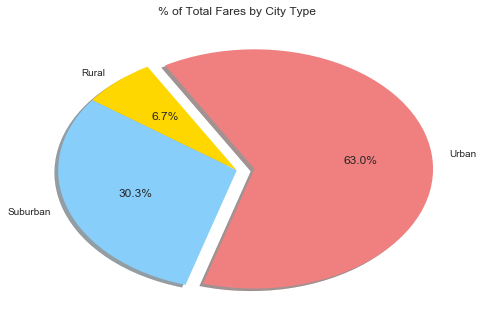

In [5]:
sFare = df_cityDataFinal.groupby('type').TotalFare.sum()
fbct_df = pd.DataFrame(sFare)
plt.pie(fbct_df['TotalFare'], explode=explode, labels=fbct_df.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.show()

### Total Rides By City Type

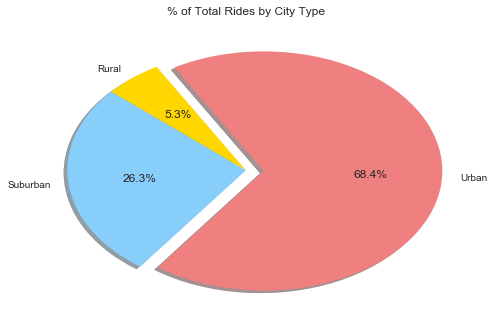

In [6]:
sRide = df_cityDataFinal.groupby('type').NoOfRides.sum()
rbct = pd.DataFrame(sRide)
plt.pie(rbct['NoOfRides'], explode=explode, labels=rbct.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
plt.show()

### Total Drivers By City Type

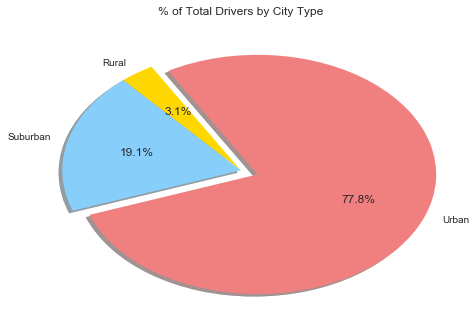

In [7]:
sDrivers = df_cityDataFinal.groupby('type').DriverCount.sum()
dbct = pd.DataFrame(sDrivers)
plt.pie(dbct['DriverCount'], explode=explode, labels=dbct.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")
plt.show()